In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
# Download mnist set and transform to tensor

if('mnist' not in dir(datasets)): #check for mnist
  print("mnist not in datasets")
else:
  data_path = "data/"
  mnist = datasets.MNIST(data_path,
                         train=True,
                         download=True,
                             transform=transforms.Compose([
                             transforms.ToTensor()]))
  
  mnist_val = datasets.MNIST(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor()]))
  

In [ ]:
mnist

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [ ]:
mnist[0][0].shape, mnist[0][1] #data

(torch.Size([1, 28, 28]), 5)

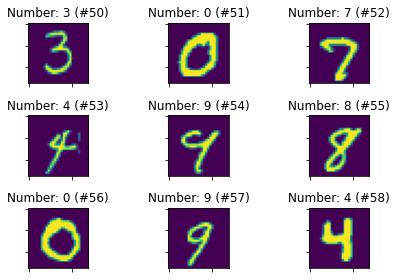

In [ ]:
# Display data
n = 3
offset = 50
figure, axis = plt.subplots(n, n)
figure.tight_layout()
indx = 0 + offset
for i in range(n):
  for j in range(n):
    axis[i, j].imshow(mnist[indx][0].reshape((28, 28)), interpolation='nearest')
    axis[i, j].set_title(f"Number: {mnist[indx][1]} (#{indx})")
    axis[i, j].set_yticklabels([])
    axis[i, j].set_xticklabels([])
    indx += 1

plt.show()

In [ ]:
n_in = 28*28 #input parameters size
n_out = 10 #total possibilities, 0-9

In [ ]:
# Model
# [28x28] -> lin256 -> tanh -> linear10

model = nn.Sequential(
    nn.Linear(n_in, 256),
    nn.Tanh(),
    nn.Linear(256, n_out)
)

loss_fn = nn.CrossEntropyLoss()

model

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Tanh()
  (2): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
#parameters & batch train set
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
n_epochs = 100

train_loader = torch.utils.data.DataLoader(mnist, batch_size=64,
                                           shuffle=True)

In [ ]:
#train model
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.058203
Epoch: 1, Loss: 0.202088
Epoch: 2, Loss: 0.066668
Epoch: 3, Loss: 0.065585
Epoch: 4, Loss: 0.189040
Epoch: 5, Loss: 0.135107
Epoch: 6, Loss: 0.169790
Epoch: 7, Loss: 0.079649
Epoch: 8, Loss: 0.206469
Epoch: 9, Loss: 0.317216
Epoch: 10, Loss: 0.085676
Epoch: 11, Loss: 0.105875
Epoch: 12, Loss: 0.071441
Epoch: 13, Loss: 0.172025
Epoch: 14, Loss: 0.143395
Epoch: 15, Loss: 0.130354
Epoch: 16, Loss: 0.036395
Epoch: 17, Loss: 0.117888
Epoch: 18, Loss: 0.268053
Epoch: 19, Loss: 0.116612
Epoch: 20, Loss: 0.113337
Epoch: 21, Loss: 0.139006
Epoch: 22, Loss: 0.325461
Epoch: 23, Loss: 0.056881
Epoch: 24, Loss: 0.158777
Epoch: 25, Loss: 0.033762
Epoch: 26, Loss: 0.035589
Epoch: 27, Loss: 0.042952
Epoch: 28, Loss: 0.055679
Epoch: 29, Loss: 0.185942
Epoch: 30, Loss: 0.049710
Epoch: 31, Loss: 0.053647
Epoch: 32, Loss: 0.058292
Epoch: 33, Loss: 0.065325
Epoch: 34, Loss: 0.377693
Epoch: 35, Loss: 0.160404
Epoch: 36, Loss: 0.160905
Epoch: 37, Loss: 0.076758
Epoch: 38, Loss: 0.086

In [ ]:
#check accuracy of train set
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.985483


In [ ]:
#check accuracy of validation set (new data)
val_loader = torch.utils.data.DataLoader(mnist_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.975300


Text(0.5, 0, 'Real: 4, Predicted: 4')

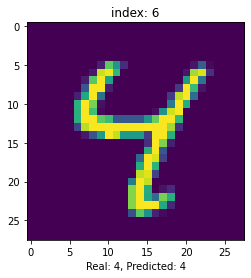

In [ ]:
#display real vs predicted data
indx = 6
DF = mnist_val
img, label = DF[indx]
out = model(img.view(img.shape[0], -1))
_, predicted = torch.max(out, dim=1)
pred = predicted[0].item()
real = label


plt.imshow(DF[indx][0].reshape((28, 28)), interpolation='nearest')
plt.title(f"index: {indx}")
plt.xlabel(f'Real: {real}, Predicted: {pred}')